# Day 6 - Lanternfish
from [AdventOfCode website](https://adventofcode.com/2021])

The sea floor is getting steeper. Maybe the sleigh keys got carried this way?

A massive school of glowing lanternfish swims past. They must spawn quickly to reach such large numbers - maybe **exponentially** quickly? You should model their growth rate to be sure.

Although you know nothing about this specific species of lanternfish, you make some guesses about their attributes. Surely, each lanternfish creates a new lanternfish once every 7 days.

However, this process isn't necessarily synchronized between every lanternfish - one lanternfish might have 2 days left until it creates another lanternfish, while another might have 4. So, you can model each fish as a single number that represents **the number of days until it creates a new lanternfish**.

Furthermore, you reason, a **new** lanternfish would surely need slightly longer before it's capable of producing more lanternfish: two more days for its first cycle.

So, suppose you have a lanternfish with an internal timer value of 3:

- After one day, its internal timer would become 2.
- After another day, its internal timer would become 1.
- After another day, its internal timer would become 0.
- After another day, its internal timer would reset to 6, and it would create a new lanternfish with an internal timer of 8.
- After another day, the first lanternfish would have an internal timer of 5, and the second lanternfish would have an internal timer of 7.

A lanternfish that creates a new fish resets its timer to 6, not 7 (because 0 is included as a valid timer value). The new lanternfish starts with an internal timer of 8 and does not start counting down until the next day.

Realizing what you're trying to do, the submarine automatically produces a list of the ages of several hundred nearby lanternfish (your puzzle input). For example, suppose you were given the following list:

```
3,4,3,1,2
```

This list means that the first fish has an internal timer of 3, the second fish has an internal timer of 4, and so on until the fifth fish, which has an internal timer of 2. Simulating these fish over several days would proceed as follows:

```
Initial state: 3,4,3,1,2
After  1 day:  2,3,2,0,1
After  2 days: 1,2,1,6,0,8
After  3 days: 0,1,0,5,6,7,8
After  4 days: 6,0,6,4,5,6,7,8,8
After  5 days: 5,6,5,3,4,5,6,7,7,8
After  6 days: 4,5,4,2,3,4,5,6,6,7
After  7 days: 3,4,3,1,2,3,4,5,5,6
After  8 days: 2,3,2,0,1,2,3,4,4,5
After  9 days: 1,2,1,6,0,1,2,3,3,4,8
After 10 days: 0,1,0,5,6,0,1,2,2,3,7,8
After 11 days: 6,0,6,4,5,6,0,1,1,2,6,7,8,8,8
After 12 days: 5,6,5,3,4,5,6,0,0,1,5,6,7,7,7,8,8
After 13 days: 4,5,4,2,3,4,5,6,6,0,4,5,6,6,6,7,7,8,8
After 14 days: 3,4,3,1,2,3,4,5,5,6,3,4,5,5,5,6,6,7,7,8
After 15 days: 2,3,2,0,1,2,3,4,4,5,2,3,4,4,4,5,5,6,6,7
After 16 days: 1,2,1,6,0,1,2,3,3,4,1,2,3,3,3,4,4,5,5,6,8
After 17 days: 0,1,0,5,6,0,1,2,2,3,0,1,2,2,2,3,3,4,4,5,7,8
After 18 days: 6,0,6,4,5,6,0,1,1,2,6,0,1,1,1,2,2,3,3,4,6,7,8,8,8,8
```

Each day, a 0 becomes a 6 and adds a new 8 to the end of the list, while each other number decreases by 1 if it was present at the start of the day.

In this example, after 18 days, there are a total of 26 fish. After 80 days, there would be a total of 5934.

Find a way to simulate lanternfish. How many lanternfish would there be after 80 days?

In [58]:
# Parsing the file as always
import pandas as pd
import re

initial_state = [3,4,3,1,2]

def parse_raw_data(raw_data):
    l = []
    for match in re.findall(r"\d+", raw_data):
        l.append(int(match))
    return l

with open("input_day6.txt") as fp:
    lines = fp.read()
    initial_state = parse_raw_data(lines)

In [59]:
# Let's over engineer this part with lots of classes and stuff, because we can

class Fish:
    def __init__(self, timer_start):
        self.timer = timer_start
    
    def step(self, fishes):
        if(self.timer == 0):
            self.timer = 6
            fishes.toAppend.append(Fish(8))
        else:
            self.timer -= 1

    def __str__(self):
        return str(self.timer)


class School:    
    def __init__(self ):
        self.__s = []
        self.toAppend = []

    # Factory method
    @classmethod
    def create_initial(cls, list):
        fishes = cls()
        for f in list: 
            fishes.__s.append(Fish(f))
        return fishes
    
    def nFishes(self): return len(self.__s)

    def day_gone(self):
        for f in self.__s:
            f.step(self)
        self.__s += self.toAppend
        self.toAppend = []

    def __str__(self):
        return ','.join(map(str, self.__s))

fishes = School.create_initial(initial_state)

print(fishes)

5,1,1,5,4,2,1,2,1,2,2,1,1,1,4,2,2,4,1,1,1,1,1,4,1,1,1,1,1,5,3,1,4,1,1,1,1,1,4,1,5,1,1,1,4,1,2,2,3,1,5,1,1,5,1,1,5,4,1,1,1,4,3,1,1,1,3,1,5,5,1,1,1,1,5,3,2,1,2,3,1,5,1,1,4,1,1,2,1,5,1,1,1,1,5,4,5,1,3,1,3,3,5,5,1,3,1,5,3,1,1,4,2,3,3,1,2,4,1,1,1,1,1,1,1,2,1,1,4,1,3,2,5,2,1,1,1,4,2,1,1,1,4,2,4,1,1,1,1,4,1,3,5,5,1,2,1,3,1,1,4,1,1,1,1,2,1,1,4,2,3,1,1,1,1,1,1,1,4,5,1,1,3,1,1,2,1,1,1,5,1,1,1,1,1,3,2,1,2,4,5,1,5,4,1,1,3,1,1,5,5,1,3,1,1,1,1,4,4,2,1,2,1,1,5,1,1,4,5,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,4,2,1,1,1,2,5,1,4,1,1,1,4,1,1,5,4,4,3,1,1,4,5,1,1,3,5,3,1,2,5,3,4,1,3,5,4,1,3,1,5,1,4,1,1,4,2,1,1,1,3,2,1,1,4


With the classes and data loaded, we can now run our crappy algorithm which is nice from a code perspective but terrible in performance

In [60]:
# Let's runt the code
from datetime import datetime

start = datetime.now()

for i in range(80):    
    fishes.day_gone()

end = datetime.now()
diff = end-start

print(f'Time for finding part 1 was {diff}')            
print(f'Solution of part 1 is {fishes.nFishes()}')

Time for finding part 1 was 0:00:01.070053
Solution of part 1 is 377263


# Part 2
The first part was done using a nice OO solution mainly used for the sake of using OO with Python once. However, performance is terrible as more days have to be simulated because growth is quadratic at least (which can be seen in the graph)

## Why isn't working wih the solution from point 1?
With the above implementation, runtime and memory both grows exponentially and it is not feasible. We have lists to append, objects to create etc... The size of the list (using mainly for storing) soons becomes impossible to manage and the solution will not be found in a reasonable time or with reasonable memory.

Let's implement it differently by only storing the number of fishes at each age and work on that. It is important to note that we actually **don't care about the fishes' position**, but only **age**. 

With that in mind, let's see how it's done with the simple example from above. With the initial state `[3,4,3,1,2]` we have 2 fishes with age 3, 1 fish with age 4 / 2 / 1. We can represent it like this:

``` 
[0 1 1 2 1 0 0 0 0 0]
```

Where position 0 corresponds to the number of fishes at age 0, position 1 corresponds to the fishes at age 1 etc... until age 9. Even though we never have fish that old, it will be used in the algorithm. 

Each day we have to 
    - Get the number of fishes that will create a new fishes.
    - Add this values to age 9 (for new fishes) 
    - Add the same value to fishes with age age 7 (as their counter is reset to 7).
    - Shift every age to the left as the day has passed. As a result, all the fishes at age 0 disappear, newly created fishes have age 8 and fishes that just had babies have age 6

This solution is very fast and does not consume memory. Of course, it also works for part 1 and the basic example as well.

[  0 168  31  29  37  35   0   0   0   0]
Solution from task 2 is 1695929023803


Text(0.5, 1.0, 'Fishes in the sea')

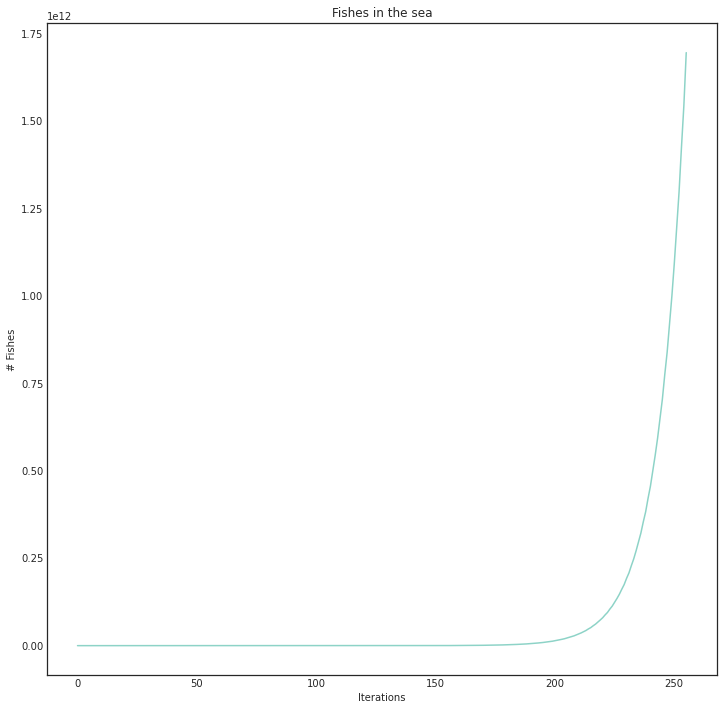

In [61]:
import numpy as np
import matplotlib as mp
from scipy.ndimage.interpolation import shift

# Each colum corresponds to an age
# initial_state = [3,4,3,1,2]

# Index 9 is used only for shifting
school = np.zeros(10, dtype=np.int64)

for n in range(10):
    ns = initial_state.count(n)
    school[n] = ns

nElems = []

def step_day(n_days, school):
    for i in range(n_days):
        give_birth = school[0]
        school[7] += give_birth
        school[9] = give_birth
        school = shift(school, -1, cval=0)
        nElems.append(school.sum())
        # Not used but so cool !
        # Replaces all negative values with 0
        # school[school < 0] = 0
    return school
        
print(school)
school = step_day(256, school)
print(f'Solution from task 2 is {school.sum()}')

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.figure(figsize=(12, 12))
plt.plot(nElems)
plt.xlabel('Iterations')
plt.ylabel('# Fishes')
plt.title("Fishes in the sea")